In [45]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
sns.set()

# Read sqlite query results into a pandas DataFrame
conn = sqlite3.connect("hyperopt_results.sqlite")

/Users/julianvanmeggelen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julianvanmeggelen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julianvanmeggelen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julianvanmeggelen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futu

<Axes: xlabel='step', ylabel='intermediate_value'>

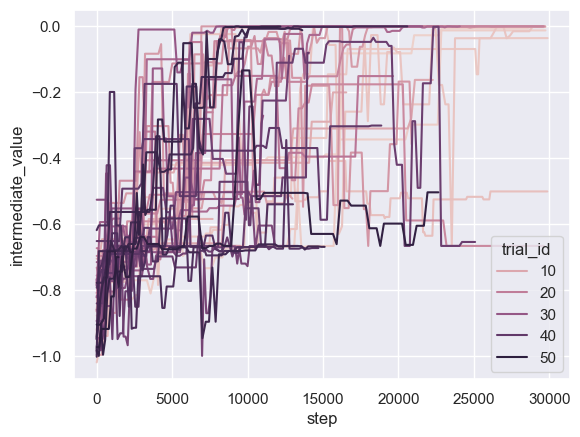

In [32]:
df = pd.read_sql_query("""
                       SELECT tiv.trial_id, tiv.step, tiv.intermediate_value  
                       from trial_intermediate_values tiv
                       """, conn)
sns.lineplot(data=df,x='step',y='intermediate_value',hue='trial_id')

/Users/julianvanmeggelen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julianvanmeggelen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julianvanmeggelen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julianvanmeggelen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futu

<Axes: xlabel='generation', ylabel='intermediate_value'>

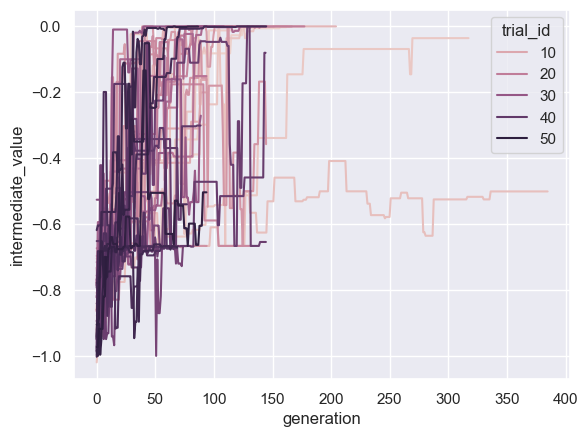

In [33]:
df = pd.read_sql_query("""
                       SELECT tiv.trial_id, tiv.step/((1+of.param_value)*ps.param_value) as generation, tiv.intermediate_value  
                       from trial_intermediate_values tiv join (
                        select trial_id, param_value from trial_params where PARAM_NAME= 'POP_SIZE'
                       ) ps on tiv.trial_id = ps.trial_id
                       join (
                        select trial_id, param_value from trial_params where PARAM_NAME= 'OFFSPRING_FRAC'
                       ) of on tiv.trial_id = of.trial_id 
                       """, conn)
sns.lineplot(data=df,x='generation',y='intermediate_value',hue='trial_id')


In [11]:
df.head()

,trial_value_id,trial_id,objective,value,value_type
0,1,1,0,-1.070345e-03,FINITE
1,2,2,0,-2.775026e-06,FINITE
2,3,3,0,-1.000000e+00,FINITE
3,4,4,0,-1.248100e-10,FINITE
4,5,5,0,-6.666864e-01,FINITE


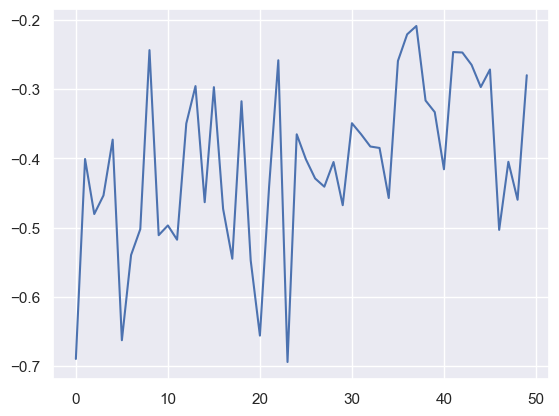

In [46]:
df = pd.read_sql_query("SELECT trial_id, value from trial_values order by trial_id", conn)
#sns.lineplot(data=df,x='trial_id',y='value',hue='trial_id')
plt.plot(df['value'])

In [47]:
cursor = conn.cursor()
cursor.execute("""
               select * from (
                select trial_id, value from trial_values where value = (select max(value) from trial_values) 
               ) tv join trial_params tp on tp.trial_id = tv.trial_id
               """)
cursor.fetchall()

[(38,
  -0.20901151491094602,
  114,
  38,
  'MUTATE_STD',
  0.2812122189678946,
  '{"name": "FloatDistribution", "attributes": {"step": null, "low": 0.01, "high": 0.9, "log": false}}'),
 (38,
  -0.20901151491094602,
  113,
  38,
  'OFFSPRING_FRAC',
  0.6327450662228278,
  '{"name": "FloatDistribution", "attributes": {"step": null, "low": 0.1, "high": 1.0, "log": false}}'),
 (38,
  -0.20901151491094602,
  112,
  38,
  'POP_SIZE',
  53.0,
  '{"name": "IntDistribution", "attributes": {"log": false, "step": 1, "low": 50, "high": 200}}')]

/Users/julianvanmeggelen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julianvanmeggelen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='MUTATE_STD', ylabel='fitness'>

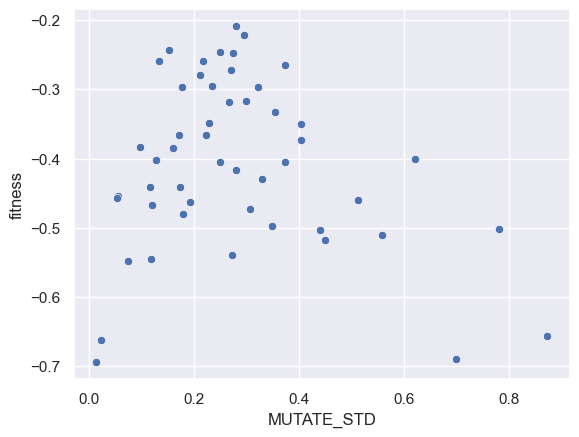

In [49]:
var = "MUTATE_STD"
df = pd.read_sql_query(f"SELECT tv.trial_id, tv.value as fitness, tp.param_value as {var} from trial_params tp join trial_values tv on tp.trial_id = tv.trial_id where tp.param_name = '{var}'", conn)
sns.scatterplot(data=df,x=var,y='fitness')


In [2]:
import main
res = []
for i in range(100):
    res.append(main.main())
plt.hist(res)



[2023-09-20 22:03:19,975] [INFO] [logging] =======================================
[2023-09-20 22:03:19,976] [INFO] [logging] =======================================
[2023-09-20 22:03:19,977] [INFO] [logging] =======================================
[2023-09-20 22:03:19,980] [INFO] [logging] New log starts here.
[2023-09-20 22:03:19,981] [INFO] [logging] =======================================
[2023-09-20 22:03:19,983] [INFO] [logging] =======================================
[2023-09-20 22:03:19,985] [INFO] [logging] =======================================
[2023-09-20 22:03:20,002] [INFO] [rng] Rng seed: 1695240200002528
[2023-09-20 22:03:20,143] [INFO] [main] Making initial population
[2023-09-20 22:03:20,164] [INFO] [main] Starting optimization
[2023-09-20 22:03:20,171] [INFO] [main] Using 130.43478260869566 generations
[2023-09-20 22:03:20,192] [INFO] [main] Generation 0 | max(fitness): -0.6853484767753998
[2023-09-20 22:03:20,258] [INFO] [main] Generation 1 | max(fitness): -0.612167

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:03:20,344] [INFO] [main] Generation 3 | max(fitness): -0.6853484767753998
[2023-09-20 22:03:20,393] [INFO] [main] Generation 4 | max(fitness): -0.6853484767753998
[2023-09-20 22:03:20,434] [INFO] [main] Generation 5 | max(fitness): -0.7737779717797411
[2023-09-20 22:03:20,487] [INFO] [main] Generation 6 | max(fitness): -0.7667888901351859
[2023-09-20 22:03:20,536] [INFO] [main] Generation 7 | max(fitness): -0.6395540356880907
[2023-09-20 22:03:20,600] [INFO] [main] Generation 8 | max(fitness): -0.6395540356880907
[2023-09-20 22:03:20,648] [INFO] [main] Generation 9 | max(fitness): -0.3725114372238665
[2023-09-20 22:03:20,706] [INFO] [main] Generation 10 | max(fitness): -0.6395540356880907
[2023-09-20 22:03:20,780] [INFO] [main] Generation 11 | max(fitness): -0.6395540356880907
[2023-09-20 22:03:20,843] [INFO] [main] Generation 12 | max(fitness): -0.6694901504643648
[2023-09-20 22:03:20,899] [INFO] [main] Generation 13 | max(fitness): -0.6694901504643648
[2023-09-20 22:03

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:03:28,812] [INFO] [main] Generation 4 | max(fitness): -0.7009741598409254
[2023-09-20 22:03:28,875] [INFO] [main] Generation 5 | max(fitness): -0.7009741598409254
[2023-09-20 22:03:28,934] [INFO] [main] Generation 6 | max(fitness): -0.7009741598409254
[2023-09-20 22:03:29,008] [INFO] [main] Generation 7 | max(fitness): -0.7009741598409254
[2023-09-20 22:03:29,065] [INFO] [main] Generation 8 | max(fitness): -0.7009741598409254
[2023-09-20 22:03:29,116] [INFO] [main] Generation 9 | max(fitness): -0.7009741598409254
[2023-09-20 22:03:29,168] [INFO] [main] Generation 10 | max(fitness): -0.7009741598409254
[2023-09-20 22:03:29,251] [INFO] [main] Generation 11 | max(fitness): -0.6882869069856661
[2023-09-20 22:03:29,309] [INFO] [main] Generation 12 | max(fitness): -0.31351692189446556
[2023-09-20 22:03:29,371] [INFO] [main] Generation 13 | max(fitness): -0.31351692189446556
[2023-09-20 22:03:29,421] [INFO] [main] Generation 14 | max(fitness): -0.31351692189446556
[2023-09-20 2

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:03:37,558] [INFO] [main] Generation 4 | max(fitness): -0.7749194850389232
[2023-09-20 22:03:37,664] [INFO] [main] Generation 5 | max(fitness): -0.7749194850389232
[2023-09-20 22:03:37,715] [INFO] [main] Generation 6 | max(fitness): -0.7585791261111882
[2023-09-20 22:03:37,767] [INFO] [main] Generation 7 | max(fitness): -0.7585791261111882
[2023-09-20 22:03:37,819] [INFO] [main] Generation 8 | max(fitness): -0.7585791261111882
[2023-09-20 22:03:38,054] [INFO] [main] Generation 9 | max(fitness): -0.7585791261111882
[2023-09-20 22:03:38,258] [INFO] [main] Generation 10 | max(fitness): -0.7585791261111882
[2023-09-20 22:03:38,330] [INFO] [main] Generation 11 | max(fitness): -0.7585791261111882
[2023-09-20 22:03:38,376] [INFO] [main] Generation 12 | max(fitness): -0.7585791261111882
[2023-09-20 22:03:38,423] [INFO] [main] Generation 13 | max(fitness): -0.7585791261111882
[2023-09-20 22:03:38,475] [INFO] [main] Generation 14 | max(fitness): -0.7237335926131506
[2023-09-20 22:0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:03:45,714] [INFO] [main] Generation 3 | max(fitness): -0.7288950099862944
[2023-09-20 22:03:45,788] [INFO] [main] Generation 4 | max(fitness): -0.7288950099862944
[2023-09-20 22:03:45,844] [INFO] [main] Generation 5 | max(fitness): -0.7288950099862944
[2023-09-20 22:03:45,908] [INFO] [main] Generation 6 | max(fitness): -0.7288950099862944
[2023-09-20 22:03:45,970] [INFO] [main] Generation 7 | max(fitness): -0.6549765705346301
[2023-09-20 22:03:46,169] [INFO] [main] Generation 8 | max(fitness): -0.6052226030357355
[2023-09-20 22:03:46,264] [INFO] [main] Generation 9 | max(fitness): -0.6052226030357355
[2023-09-20 22:03:46,313] [INFO] [main] Generation 10 | max(fitness): -0.6052226030357355
[2023-09-20 22:03:46,363] [INFO] [main] Generation 11 | max(fitness): -0.667301153433735
[2023-09-20 22:03:46,410] [INFO] [main] Generation 12 | max(fitness): -0.5833778174941293
[2023-09-20 22:03:46,467] [INFO] [main] Generation 13 | max(fitness): -0.5776479665315302
[2023-09-20 22:03:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:03:53,319] [INFO] [main] Generation 5 | max(fitness): -0.7091323705552282
[2023-09-20 22:03:53,377] [INFO] [main] Generation 6 | max(fitness): -0.6964198460590736
[2023-09-20 22:03:53,443] [INFO] [main] Generation 7 | max(fitness): -0.6620530648128126
[2023-09-20 22:03:53,518] [INFO] [main] Generation 8 | max(fitness): -0.7072409237324698
[2023-09-20 22:03:53,569] [INFO] [main] Generation 9 | max(fitness): -0.7072409237324698
[2023-09-20 22:03:53,619] [INFO] [main] Generation 10 | max(fitness): -0.4373931848422575
[2023-09-20 22:03:53,668] [INFO] [main] Generation 11 | max(fitness): -0.4373931848422575
[2023-09-20 22:03:53,738] [INFO] [main] Generation 12 | max(fitness): -0.4373931848422575
[2023-09-20 22:03:53,935] [INFO] [main] Generation 13 | max(fitness): -0.4373931848422575
[2023-09-20 22:03:53,979] [INFO] [main] Generation 14 | max(fitness): -0.4373931848422575
[2023-09-20 22:03:54,021] [INFO] [main] Generation 15 | max(fitness): -0.4373931848422575
[2023-09-20 22:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:04:01,645] [INFO] [main] Generation 3 | max(fitness): -0.7892686292063743
[2023-09-20 22:04:01,698] [INFO] [main] Generation 4 | max(fitness): -0.7892686292063743
[2023-09-20 22:04:01,743] [INFO] [main] Generation 5 | max(fitness): -0.5806896589638428
[2023-09-20 22:04:01,788] [INFO] [main] Generation 6 | max(fitness): -0.2427633214562017
[2023-09-20 22:04:01,831] [INFO] [main] Generation 7 | max(fitness): -0.2427633214562017
[2023-09-20 22:04:01,879] [INFO] [main] Generation 8 | max(fitness): -0.2427633214562017
[2023-09-20 22:04:01,928] [INFO] [main] Generation 9 | max(fitness): -0.2427633214562017
[2023-09-20 22:04:01,978] [INFO] [main] Generation 10 | max(fitness): -0.5806896589638428
[2023-09-20 22:04:02,035] [INFO] [main] Generation 11 | max(fitness): -0.5806896589638428
[2023-09-20 22:04:02,082] [INFO] [main] Generation 12 | max(fitness): -0.5806896589638428
[2023-09-20 22:04:02,129] [INFO] [main] Generation 13 | max(fitness): -0.5806896589638428
[2023-09-20 22:04

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:04:09,291] [INFO] [main] Generation 4 | max(fitness): -0.6867233457261139
[2023-09-20 22:04:09,334] [INFO] [main] Generation 5 | max(fitness): -0.6867233457261139
[2023-09-20 22:04:09,381] [INFO] [main] Generation 6 | max(fitness): -0.6867233457261139
[2023-09-20 22:04:09,438] [INFO] [main] Generation 7 | max(fitness): -0.23328711300266122
[2023-09-20 22:04:09,487] [INFO] [main] Generation 8 | max(fitness): -0.23328711300266122
[2023-09-20 22:04:09,531] [INFO] [main] Generation 9 | max(fitness): -0.23328711300266122
[2023-09-20 22:04:09,586] [INFO] [main] Generation 10 | max(fitness): -0.23328711300266122
[2023-09-20 22:04:09,651] [INFO] [main] Generation 11 | max(fitness): -0.1346782812397245
[2023-09-20 22:04:09,727] [INFO] [main] Generation 12 | max(fitness): -0.1346782812397245
[2023-09-20 22:04:09,779] [INFO] [main] Generation 13 | max(fitness): -0.1346782812397245
[2023-09-20 22:04:09,835] [INFO] [main] Generation 14 | max(fitness): -0.1346782812397245
[2023-09-20 

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:04:18,029] [INFO] [main] Generation 3 | max(fitness): -0.9147310903377551
[2023-09-20 22:04:18,108] [INFO] [main] Generation 4 | max(fitness): -0.8932984666627197
[2023-09-20 22:04:18,154] [INFO] [main] Generation 5 | max(fitness): -0.925632734132174
[2023-09-20 22:04:18,209] [INFO] [main] Generation 6 | max(fitness): -0.925632734132174
[2023-09-20 22:04:18,335] [INFO] [main] Generation 7 | max(fitness): -0.7760145028914422
[2023-09-20 22:04:18,438] [INFO] [main] Generation 8 | max(fitness): -0.7760145028914422
[2023-09-20 22:04:18,726] [INFO] [main] Generation 9 | max(fitness): -0.7466023912166273
[2023-09-20 22:04:18,867] [INFO] [main] Generation 10 | max(fitness): -0.7466023912166273
[2023-09-20 22:04:18,942] [INFO] [main] Generation 11 | max(fitness): -0.5370098584740756
[2023-09-20 22:04:19,000] [INFO] [main] Generation 12 | max(fitness): -0.5370098584740756
[2023-09-20 22:04:19,059] [INFO] [main] Generation 13 | max(fitness): -0.5370098584740756
[2023-09-20 22:04:1

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:04:25,737] [INFO] [main] Generation 4 | max(fitness): -0.7934616746658913
[2023-09-20 22:04:25,794] [INFO] [main] Generation 5 | max(fitness): -0.5910612716174029
[2023-09-20 22:04:25,836] [INFO] [main] Generation 6 | max(fitness): -0.5910612716174029
[2023-09-20 22:04:25,895] [INFO] [main] Generation 7 | max(fitness): -0.5910612716174029
[2023-09-20 22:04:26,102] [INFO] [main] Generation 8 | max(fitness): -0.5910612716174029
[2023-09-20 22:04:26,159] [INFO] [main] Generation 9 | max(fitness): -0.273921607555364
[2023-09-20 22:04:26,224] [INFO] [main] Generation 10 | max(fitness): -0.5910612716174029
[2023-09-20 22:04:26,286] [INFO] [main] Generation 11 | max(fitness): -0.5910612716174029
[2023-09-20 22:04:26,340] [INFO] [main] Generation 12 | max(fitness): -0.3392225049215446
[2023-09-20 22:04:26,443] [INFO] [main] Generation 13 | max(fitness): -0.3392225049215446
[2023-09-20 22:04:26,597] [INFO] [main] Generation 14 | max(fitness): -0.3392225049215446
[2023-09-20 22:04

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:04:33,255] [INFO] [main] Generation 4 | max(fitness): -0.8140175021118463
[2023-09-20 22:04:33,298] [INFO] [main] Generation 5 | max(fitness): -0.7112211998165797
[2023-09-20 22:04:33,348] [INFO] [main] Generation 6 | max(fitness): -0.4958566044094139
[2023-09-20 22:04:33,409] [INFO] [main] Generation 7 | max(fitness): -0.4958566044094139
[2023-09-20 22:04:33,461] [INFO] [main] Generation 8 | max(fitness): -0.4953212622030468
[2023-09-20 22:04:33,518] [INFO] [main] Generation 9 | max(fitness): -0.4953212622030468
[2023-09-20 22:04:33,584] [INFO] [main] Generation 10 | max(fitness): -0.4953212622030468
[2023-09-20 22:04:33,663] [INFO] [main] Generation 11 | max(fitness): -0.4953212622030468
[2023-09-20 22:04:33,712] [INFO] [main] Generation 12 | max(fitness): -0.4953212622030468
[2023-09-20 22:04:33,758] [INFO] [main] Generation 13 | max(fitness): -0.5369616605986336
[2023-09-20 22:04:33,805] [INFO] [main] Generation 14 | max(fitness): -0.5369616605986336
[2023-09-20 22:0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:04:41,828] [INFO] [main] Generation 1 | max(fitness): -0.8059316444733634
[2023-09-20 22:04:41,887] [INFO] [main] Generation 2 | max(fitness): -0.8059316444733634
[2023-09-20 22:04:41,985] [INFO] [main] Generation 3 | max(fitness): -0.7634136414756956
[2023-09-20 22:04:42,092] [INFO] [main] Generation 4 | max(fitness): -0.6796013686454245
[2023-09-20 22:04:42,170] [INFO] [main] Generation 5 | max(fitness): -0.6796013686454245
[2023-09-20 22:04:42,221] [INFO] [main] Generation 6 | max(fitness): -0.6968231413870176
[2023-09-20 22:04:42,280] [INFO] [main] Generation 7 | max(fitness): -0.7528721706250356
[2023-09-20 22:04:42,341] [INFO] [main] Generation 8 | max(fitness): -0.7528721706250356
[2023-09-20 22:04:42,412] [INFO] [main] Generation 9 | max(fitness): -0.7528721706250356
[2023-09-20 22:04:42,475] [INFO] [main] Generation 10 | max(fitness): -0.7528721706250356
[2023-09-20 22:04:42,537] [INFO] [main] Generation 11 | max(fitness): -0.7528721706250356
[2023-09-20 22:04:4

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:04:50,589] [INFO] [main] Generation 4 | max(fitness): -0.7176511337807744
[2023-09-20 22:04:50,699] [INFO] [main] Generation 5 | max(fitness): -0.7176511337807744
[2023-09-20 22:04:50,900] [INFO] [main] Generation 6 | max(fitness): -0.7176511337807744
[2023-09-20 22:04:50,979] [INFO] [main] Generation 7 | max(fitness): -0.7010976024254043
[2023-09-20 22:04:51,075] [INFO] [main] Generation 8 | max(fitness): -0.7010976024254043
[2023-09-20 22:04:51,121] [INFO] [main] Generation 9 | max(fitness): -0.6102354856801876
[2023-09-20 22:04:51,165] [INFO] [main] Generation 10 | max(fitness): -0.6102354856801876
[2023-09-20 22:04:51,420] [INFO] [main] Generation 11 | max(fitness): -0.6102354856801876
[2023-09-20 22:04:51,475] [INFO] [main] Generation 12 | max(fitness): -0.6102354856801876
[2023-09-20 22:04:51,533] [INFO] [main] Generation 13 | max(fitness): -0.6102354856801876
[2023-09-20 22:04:51,589] [INFO] [main] Generation 14 | max(fitness): -0.36997652753363297
[2023-09-20 22:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:04:58,054] [INFO] [main] Generation 4 | max(fitness): -0.43589252972547105
[2023-09-20 22:04:58,122] [INFO] [main] Generation 5 | max(fitness): -0.43589252972547105
[2023-09-20 22:04:58,177] [INFO] [main] Generation 6 | max(fitness): -0.43589252972547105
[2023-09-20 22:04:58,241] [INFO] [main] Generation 7 | max(fitness): -0.43589252972547105
[2023-09-20 22:04:58,299] [INFO] [main] Generation 8 | max(fitness): -0.43589252972547105
[2023-09-20 22:04:58,347] [INFO] [main] Generation 9 | max(fitness): -0.43589252972547105
[2023-09-20 22:04:58,534] [INFO] [main] Generation 10 | max(fitness): -0.43589252972547105
[2023-09-20 22:04:58,604] [INFO] [main] Generation 11 | max(fitness): -0.43589252972547105
[2023-09-20 22:04:58,654] [INFO] [main] Generation 12 | max(fitness): -0.43589252972547105
[2023-09-20 22:04:58,729] [INFO] [main] Generation 13 | max(fitness): -0.43589252972547105
[2023-09-20 22:04:58,771] [INFO] [main] Generation 14 | max(fitness): -0.2477102840967289
[2023-

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:05:06,866] [INFO] [main] Generation 2 | max(fitness): -0.743608556497268
[2023-09-20 22:05:07,016] [INFO] [main] Generation 3 | max(fitness): -0.743608556497268
[2023-09-20 22:05:07,116] [INFO] [main] Generation 4 | max(fitness): -0.743608556497268
[2023-09-20 22:05:07,188] [INFO] [main] Generation 5 | max(fitness): -0.743608556497268
[2023-09-20 22:05:07,263] [INFO] [main] Generation 6 | max(fitness): -0.743608556497268
[2023-09-20 22:05:07,595] [INFO] [main] Generation 7 | max(fitness): -0.6741142800540584
[2023-09-20 22:05:07,648] [INFO] [main] Generation 8 | max(fitness): -0.6741142800540584
[2023-09-20 22:05:07,702] [INFO] [main] Generation 9 | max(fitness): -0.6741142800540584
[2023-09-20 22:05:07,792] [INFO] [main] Generation 10 | max(fitness): -0.6741142800540584
[2023-09-20 22:05:07,865] [INFO] [main] Generation 11 | max(fitness): -0.6741142800540584
[2023-09-20 22:05:07,940] [INFO] [main] Generation 12 | max(fitness): -0.6741142800540584
[2023-09-20 22:05:08,01

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:05:15,632] [INFO] [main] Generation 2 | max(fitness): -0.7752508283679019
[2023-09-20 22:05:15,711] [INFO] [main] Generation 3 | max(fitness): -0.7752508283679019
[2023-09-20 22:05:15,921] [INFO] [main] Generation 4 | max(fitness): -0.7752508283679019
[2023-09-20 22:05:16,038] [INFO] [main] Generation 5 | max(fitness): -0.6254871492545336
[2023-09-20 22:05:16,087] [INFO] [main] Generation 6 | max(fitness): -0.6254871492545336
[2023-09-20 22:05:16,140] [INFO] [main] Generation 7 | max(fitness): -0.6254871492545336
[2023-09-20 22:05:16,201] [INFO] [main] Generation 8 | max(fitness): -0.6254871492545336
[2023-09-20 22:05:16,287] [INFO] [main] Generation 9 | max(fitness): -0.672472621405635
[2023-09-20 22:05:16,390] [INFO] [main] Generation 10 | max(fitness): -0.46102641823633517
[2023-09-20 22:05:16,471] [INFO] [main] Generation 11 | max(fitness): -0.46102641823633517
[2023-09-20 22:05:16,536] [INFO] [main] Generation 12 | max(fitness): -0.46102641823633517
[2023-09-20 22:0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:05:24,452] [INFO] [main] Generation 3 | max(fitness): -0.681918720211484
[2023-09-20 22:05:24,513] [INFO] [main] Generation 4 | max(fitness): -0.681918720211484
[2023-09-20 22:05:24,577] [INFO] [main] Generation 5 | max(fitness): -0.681918720211484
[2023-09-20 22:05:24,637] [INFO] [main] Generation 6 | max(fitness): -0.681918720211484
[2023-09-20 22:05:24,681] [INFO] [main] Generation 7 | max(fitness): -0.681918720211484
[2023-09-20 22:05:24,728] [INFO] [main] Generation 8 | max(fitness): -0.8082425162332042
[2023-09-20 22:05:24,792] [INFO] [main] Generation 9 | max(fitness): -0.49898511151513353
[2023-09-20 22:05:24,844] [INFO] [main] Generation 10 | max(fitness): -0.49898511151513353
[2023-09-20 22:05:24,906] [INFO] [main] Generation 11 | max(fitness): -0.49898511151513353
[2023-09-20 22:05:24,952] [INFO] [main] Generation 12 | max(fitness): -0.7184310079653028
[2023-09-20 22:05:24,998] [INFO] [main] Generation 13 | max(fitness): -0.7184310079653028
[2023-09-20 22:05:2

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:05:31,844] [INFO] [main] Generation 1 | max(fitness): -0.6719099264968212
[2023-09-20 22:05:31,912] [INFO] [main] Generation 2 | max(fitness): -0.6719099264968212
[2023-09-20 22:05:31,965] [INFO] [main] Generation 3 | max(fitness): -0.6719099264968212
[2023-09-20 22:05:32,022] [INFO] [main] Generation 4 | max(fitness): -0.639314566509395
[2023-09-20 22:05:32,072] [INFO] [main] Generation 5 | max(fitness): -0.7609779598584651
[2023-09-20 22:05:32,123] [INFO] [main] Generation 6 | max(fitness): -0.7609779598584651
[2023-09-20 22:05:32,171] [INFO] [main] Generation 7 | max(fitness): -0.7609779598584651
[2023-09-20 22:05:32,223] [INFO] [main] Generation 8 | max(fitness): -0.7609779598584651
[2023-09-20 22:05:32,268] [INFO] [main] Generation 9 | max(fitness): -0.7609779598584651
[2023-09-20 22:05:32,317] [INFO] [main] Generation 10 | max(fitness): -0.7247259634975656
[2023-09-20 22:05:32,369] [INFO] [main] Generation 11 | max(fitness): -0.6614299257349835
[2023-09-20 22:05:32

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:05:39,784] [INFO] [main] Generation 4 | max(fitness): -0.7469947044548905
[2023-09-20 22:05:39,829] [INFO] [main] Generation 5 | max(fitness): -0.7469947044548905
[2023-09-20 22:05:39,886] [INFO] [main] Generation 6 | max(fitness): -0.7469947044548905
[2023-09-20 22:05:39,960] [INFO] [main] Generation 7 | max(fitness): -0.7469947044548905
[2023-09-20 22:05:40,020] [INFO] [main] Generation 8 | max(fitness): -0.6968612951560984
[2023-09-20 22:05:40,072] [INFO] [main] Generation 9 | max(fitness): -0.6677700028542419
[2023-09-20 22:05:40,140] [INFO] [main] Generation 10 | max(fitness): -0.6677700028542419
[2023-09-20 22:05:40,189] [INFO] [main] Generation 11 | max(fitness): -0.6677700028542419
[2023-09-20 22:05:40,242] [INFO] [main] Generation 12 | max(fitness): -0.6859317655500013
[2023-09-20 22:05:40,292] [INFO] [main] Generation 13 | max(fitness): -0.6859317655500013
[2023-09-20 22:05:40,356] [INFO] [main] Generation 14 | max(fitness): -0.6856295571984925
[2023-09-20 22:0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:05:47,171] [INFO] [main] Generation 4 | max(fitness): -0.7425907455175783
[2023-09-20 22:05:47,262] [INFO] [main] Generation 5 | max(fitness): -0.7425907455175783
[2023-09-20 22:05:47,329] [INFO] [main] Generation 6 | max(fitness): -0.7425907455175783
[2023-09-20 22:05:47,389] [INFO] [main] Generation 7 | max(fitness): -0.7425907455175783
[2023-09-20 22:05:47,440] [INFO] [main] Generation 8 | max(fitness): -0.7425907455175783
[2023-09-20 22:05:47,492] [INFO] [main] Generation 9 | max(fitness): -0.7425907455175783
[2023-09-20 22:05:47,547] [INFO] [main] Generation 10 | max(fitness): -0.6702224625395975
[2023-09-20 22:05:47,605] [INFO] [main] Generation 11 | max(fitness): -0.6702224625395975
[2023-09-20 22:05:47,659] [INFO] [main] Generation 12 | max(fitness): -0.6702224625395975
[2023-09-20 22:05:47,705] [INFO] [main] Generation 13 | max(fitness): -0.6175814455977671
[2023-09-20 22:05:47,754] [INFO] [main] Generation 14 | max(fitness): -0.6702224625395975
[2023-09-20 22:0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:05:54,479] [INFO] [main] Generation 4 | max(fitness): -0.6915822472937653
[2023-09-20 22:05:54,534] [INFO] [main] Generation 5 | max(fitness): -0.6915822472937653
[2023-09-20 22:05:54,604] [INFO] [main] Generation 6 | max(fitness): -0.5422911336176214
[2023-09-20 22:05:54,659] [INFO] [main] Generation 7 | max(fitness): -0.5422911336176214
[2023-09-20 22:05:54,709] [INFO] [main] Generation 8 | max(fitness): -0.5422911336176214
[2023-09-20 22:05:54,757] [INFO] [main] Generation 9 | max(fitness): -0.5422911336176214
[2023-09-20 22:05:54,812] [INFO] [main] Generation 10 | max(fitness): -0.3359720527045079
[2023-09-20 22:05:54,877] [INFO] [main] Generation 11 | max(fitness): -0.3359720527045079
[2023-09-20 22:05:54,928] [INFO] [main] Generation 12 | max(fitness): -0.3359720527045079
[2023-09-20 22:05:54,978] [INFO] [main] Generation 13 | max(fitness): -0.3247318615915523
[2023-09-20 22:05:55,029] [INFO] [main] Generation 14 | max(fitness): -0.21648882966722094
[2023-09-20 22:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:06:02,040] [INFO] [main] Generation 1 | max(fitness): -0.6679263187285044
[2023-09-20 22:06:02,154] [INFO] [main] Generation 2 | max(fitness): -0.6679263187285044
[2023-09-20 22:06:02,261] [INFO] [main] Generation 3 | max(fitness): -0.6679263187285044
[2023-09-20 22:06:02,378] [INFO] [main] Generation 4 | max(fitness): -0.6679263187285044
[2023-09-20 22:06:02,469] [INFO] [main] Generation 5 | max(fitness): -0.6679263187285044
[2023-09-20 22:06:02,539] [INFO] [main] Generation 6 | max(fitness): -0.6679263187285044
[2023-09-20 22:06:02,595] [INFO] [main] Generation 7 | max(fitness): -0.6679263187285044
[2023-09-20 22:06:02,681] [INFO] [main] Generation 8 | max(fitness): -0.6679263187285044
[2023-09-20 22:06:02,775] [INFO] [main] Generation 9 | max(fitness): -0.6679263187285044
[2023-09-20 22:06:02,837] [INFO] [main] Generation 10 | max(fitness): -0.6679263187285044
[2023-09-20 22:06:02,889] [INFO] [main] Generation 11 | max(fitness): -0.43118856470740174
[2023-09-20 22:06:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:06:10,382] [INFO] [main] Generation 3 | max(fitness): -0.29687990495664485
[2023-09-20 22:06:10,500] [INFO] [main] Generation 4 | max(fitness): -0.29687990495664485
[2023-09-20 22:06:10,610] [INFO] [main] Generation 5 | max(fitness): -0.29687990495664485
[2023-09-20 22:06:10,666] [INFO] [main] Generation 6 | max(fitness): -0.29687990495664485
[2023-09-20 22:06:10,711] [INFO] [main] Generation 7 | max(fitness): -0.29687990495664485
[2023-09-20 22:06:10,759] [INFO] [main] Generation 8 | max(fitness): -0.29687990495664485
[2023-09-20 22:06:10,803] [INFO] [main] Generation 9 | max(fitness): -0.29687990495664485
[2023-09-20 22:06:10,856] [INFO] [main] Generation 10 | max(fitness): -0.29687990495664485
[2023-09-20 22:06:10,903] [INFO] [main] Generation 11 | max(fitness): -0.29687990495664485
[2023-09-20 22:06:10,948] [INFO] [main] Generation 12 | max(fitness): -0.3568344775490944
[2023-09-20 22:06:10,989] [INFO] [main] Generation 13 | max(fitness): -0.3568344775490944
[2023-09

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:06:17,227] [INFO] [main] Generation 4 | max(fitness): -0.6783007823057403
[2023-09-20 22:06:17,286] [INFO] [main] Generation 5 | max(fitness): -0.6783007823057403
[2023-09-20 22:06:17,337] [INFO] [main] Generation 6 | max(fitness): -0.6783007823057403
[2023-09-20 22:06:17,387] [INFO] [main] Generation 7 | max(fitness): -0.6783007823057403
[2023-09-20 22:06:17,437] [INFO] [main] Generation 8 | max(fitness): -0.6783007823057403
[2023-09-20 22:06:17,481] [INFO] [main] Generation 9 | max(fitness): -0.6783007823057403
[2023-09-20 22:06:17,526] [INFO] [main] Generation 10 | max(fitness): -0.6783007823057403
[2023-09-20 22:06:17,571] [INFO] [main] Generation 11 | max(fitness): -0.6783007823057403
[2023-09-20 22:06:17,617] [INFO] [main] Generation 12 | max(fitness): -0.6783007823057403
[2023-09-20 22:06:17,665] [INFO] [main] Generation 13 | max(fitness): -0.6783007823057403
[2023-09-20 22:06:17,718] [INFO] [main] Generation 14 | max(fitness): -0.6715806486173471
[2023-09-20 22:0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:06:24,008] [INFO] [main] Generation 4 | max(fitness): -0.7150516973583286
[2023-09-20 22:06:24,090] [INFO] [main] Generation 5 | max(fitness): -0.5304574616242584
[2023-09-20 22:06:24,153] [INFO] [main] Generation 6 | max(fitness): -0.5304574616242584
[2023-09-20 22:06:24,225] [INFO] [main] Generation 7 | max(fitness): -0.5304574616242584
[2023-09-20 22:06:24,303] [INFO] [main] Generation 8 | max(fitness): -0.5304574616242584
[2023-09-20 22:06:24,366] [INFO] [main] Generation 9 | max(fitness): -0.3617380382149009
[2023-09-20 22:06:24,429] [INFO] [main] Generation 10 | max(fitness): -0.3617380382149009
[2023-09-20 22:06:24,488] [INFO] [main] Generation 11 | max(fitness): -0.3617380382149009
[2023-09-20 22:06:24,534] [INFO] [main] Generation 12 | max(fitness): -0.3617380382149009
[2023-09-20 22:06:24,578] [INFO] [main] Generation 13 | max(fitness): -0.19260842984459942
[2023-09-20 22:06:24,626] [INFO] [main] Generation 14 | max(fitness): -0.19260842984459942
[2023-09-20 22

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:06:30,735] [INFO] [main] Generation 4 | max(fitness): -0.8644464739406514
[2023-09-20 22:06:30,786] [INFO] [main] Generation 5 | max(fitness): -0.5940004582929065
[2023-09-20 22:06:30,838] [INFO] [main] Generation 6 | max(fitness): -0.5940004582929065
[2023-09-20 22:06:30,904] [INFO] [main] Generation 7 | max(fitness): -0.5940004582929065
[2023-09-20 22:06:31,015] [INFO] [main] Generation 8 | max(fitness): -0.6892004379463086
[2023-09-20 22:06:31,163] [INFO] [main] Generation 9 | max(fitness): -0.6892004379463086
[2023-09-20 22:06:31,216] [INFO] [main] Generation 10 | max(fitness): -0.6892004379463086
[2023-09-20 22:06:31,269] [INFO] [main] Generation 11 | max(fitness): -0.5823626857726532
[2023-09-20 22:06:31,323] [INFO] [main] Generation 12 | max(fitness): -0.5823626857726532
[2023-09-20 22:06:31,370] [INFO] [main] Generation 13 | max(fitness): -0.5823626857726532
[2023-09-20 22:06:31,415] [INFO] [main] Generation 14 | max(fitness): -0.5677254796446947
[2023-09-20 22:0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:06:37,938] [INFO] [main] Generation 4 | max(fitness): -0.7352155183078728
[2023-09-20 22:06:37,992] [INFO] [main] Generation 5 | max(fitness): -0.7352155183078728
[2023-09-20 22:06:38,067] [INFO] [main] Generation 6 | max(fitness): -0.7352155183078728
[2023-09-20 22:06:38,115] [INFO] [main] Generation 7 | max(fitness): -0.7352155183078728
[2023-09-20 22:06:38,167] [INFO] [main] Generation 8 | max(fitness): -0.7352155183078728
[2023-09-20 22:06:38,227] [INFO] [main] Generation 9 | max(fitness): -0.7352155183078728
[2023-09-20 22:06:38,274] [INFO] [main] Generation 10 | max(fitness): -0.7916424811305977
[2023-09-20 22:06:38,315] [INFO] [main] Generation 11 | max(fitness): -0.7916424811305977
[2023-09-20 22:06:38,366] [INFO] [main] Generation 12 | max(fitness): -0.6260320382583354
[2023-09-20 22:06:38,423] [INFO] [main] Generation 13 | max(fitness): -0.6260320382583354
[2023-09-20 22:06:38,496] [INFO] [main] Generation 14 | max(fitness): -0.17436402040843968
[2023-09-20 22:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:06:44,952] [INFO] [main] Generation 4 | max(fitness): -0.6924775332624253
[2023-09-20 22:06:45,000] [INFO] [main] Generation 5 | max(fitness): -0.6924775332624253
[2023-09-20 22:06:45,054] [INFO] [main] Generation 6 | max(fitness): -0.6924775332624253
[2023-09-20 22:06:45,108] [INFO] [main] Generation 7 | max(fitness): -0.6924775332624253
[2023-09-20 22:06:45,164] [INFO] [main] Generation 8 | max(fitness): -0.690124541925463
[2023-09-20 22:06:45,218] [INFO] [main] Generation 9 | max(fitness): -0.690124541925463
[2023-09-20 22:06:45,272] [INFO] [main] Generation 10 | max(fitness): -0.690124541925463
[2023-09-20 22:06:45,319] [INFO] [main] Generation 11 | max(fitness): -0.6742457764634774
[2023-09-20 22:06:45,361] [INFO] [main] Generation 12 | max(fitness): -0.6742457764634774
[2023-09-20 22:06:45,407] [INFO] [main] Generation 13 | max(fitness): -0.3940856505303663
[2023-09-20 22:06:45,451] [INFO] [main] Generation 14 | max(fitness): -0.3940856505303663
[2023-09-20 22:06:4

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:06:54,111] [INFO] [main] Generation 1 | max(fitness): -0.913774659783011
[2023-09-20 22:06:54,171] [INFO] [main] Generation 2 | max(fitness): -0.8155929603223944
[2023-09-20 22:06:54,244] [INFO] [main] Generation 3 | max(fitness): -0.8155929603223944
[2023-09-20 22:06:54,291] [INFO] [main] Generation 4 | max(fitness): -0.8155929603223944
[2023-09-20 22:06:54,338] [INFO] [main] Generation 5 | max(fitness): -0.8155929603223944
[2023-09-20 22:06:54,387] [INFO] [main] Generation 6 | max(fitness): -0.578326253417025
[2023-09-20 22:06:54,449] [INFO] [main] Generation 7 | max(fitness): -0.578326253417025
[2023-09-20 22:06:54,601] [INFO] [main] Generation 8 | max(fitness): -0.578326253417025
[2023-09-20 22:06:54,695] [INFO] [main] Generation 9 | max(fitness): -0.578326253417025
[2023-09-20 22:06:54,750] [INFO] [main] Generation 10 | max(fitness): -0.578326253417025
[2023-09-20 22:06:54,811] [INFO] [main] Generation 11 | max(fitness): -0.6510418122505788
[2023-09-20 22:06:54,862]

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:07:01,937] [INFO] [main] Generation 2 | max(fitness): -0.7038362727995311
[2023-09-20 22:07:02,035] [INFO] [main] Generation 3 | max(fitness): -0.5520003434960629
[2023-09-20 22:07:02,152] [INFO] [main] Generation 4 | max(fitness): -0.5520003434960629
[2023-09-20 22:07:02,198] [INFO] [main] Generation 5 | max(fitness): -0.481179586381356
[2023-09-20 22:07:02,246] [INFO] [main] Generation 6 | max(fitness): -0.481179586381356
[2023-09-20 22:07:02,290] [INFO] [main] Generation 7 | max(fitness): -0.481179586381356
[2023-09-20 22:07:02,337] [INFO] [main] Generation 8 | max(fitness): -0.481179586381356
[2023-09-20 22:07:02,391] [INFO] [main] Generation 9 | max(fitness): -0.481179586381356
[2023-09-20 22:07:02,440] [INFO] [main] Generation 10 | max(fitness): -0.32515435821941646
[2023-09-20 22:07:02,495] [INFO] [main] Generation 11 | max(fitness): -0.32515435821941646
[2023-09-20 22:07:02,533] [INFO] [main] Generation 12 | max(fitness): -0.32515435821941646
[2023-09-20 22:07:02

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:07:08,432] [INFO] [main] Generation 5 | max(fitness): -0.6055679659841172
[2023-09-20 22:07:08,499] [INFO] [main] Generation 6 | max(fitness): -0.6055679659841172
[2023-09-20 22:07:08,545] [INFO] [main] Generation 7 | max(fitness): -0.4860633421179212
[2023-09-20 22:07:08,592] [INFO] [main] Generation 8 | max(fitness): -0.4860633421179212
[2023-09-20 22:07:08,638] [INFO] [main] Generation 9 | max(fitness): -0.4860633421179212
[2023-09-20 22:07:08,683] [INFO] [main] Generation 10 | max(fitness): -0.4257261089130183
[2023-09-20 22:07:08,729] [INFO] [main] Generation 11 | max(fitness): -0.4257261089130183
[2023-09-20 22:07:08,776] [INFO] [main] Generation 12 | max(fitness): -0.4257261089130183
[2023-09-20 22:07:08,822] [INFO] [main] Generation 13 | max(fitness): -0.4257261089130183
[2023-09-20 22:07:08,874] [INFO] [main] Generation 14 | max(fitness): -0.15753475533682884
[2023-09-20 22:07:08,929] [INFO] [main] Generation 15 | max(fitness): -0.15753475533682884
[2023-09-20 2

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:07:17,638] [INFO] [main] Generation 4 | max(fitness): -0.6929218632342959
[2023-09-20 22:07:17,682] [INFO] [main] Generation 5 | max(fitness): -0.6929218632342959
[2023-09-20 22:07:17,730] [INFO] [main] Generation 6 | max(fitness): -0.6669229927640103
[2023-09-20 22:07:17,777] [INFO] [main] Generation 7 | max(fitness): -0.6558978790993755
[2023-09-20 22:07:17,819] [INFO] [main] Generation 8 | max(fitness): -0.6558978790993755
[2023-09-20 22:07:17,860] [INFO] [main] Generation 9 | max(fitness): -0.6558978790993755
[2023-09-20 22:07:17,908] [INFO] [main] Generation 10 | max(fitness): -0.6558978790993755
[2023-09-20 22:07:17,963] [INFO] [main] Generation 11 | max(fitness): -0.637639855955288
[2023-09-20 22:07:18,036] [INFO] [main] Generation 12 | max(fitness): -0.637639855955288
[2023-09-20 22:07:18,138] [INFO] [main] Generation 13 | max(fitness): -0.5068090251408661
[2023-09-20 22:07:18,215] [INFO] [main] Generation 14 | max(fitness): -0.5068090251408661
[2023-09-20 22:07:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:07:24,338] [INFO] [main] Generation 4 | max(fitness): -0.38448693643525095
[2023-09-20 22:07:24,389] [INFO] [main] Generation 5 | max(fitness): -0.38448693643525095
[2023-09-20 22:07:24,432] [INFO] [main] Generation 6 | max(fitness): -0.38448693643525095
[2023-09-20 22:07:24,477] [INFO] [main] Generation 7 | max(fitness): -0.38448693643525095
[2023-09-20 22:07:24,521] [INFO] [main] Generation 8 | max(fitness): -0.38448693643525095
[2023-09-20 22:07:24,568] [INFO] [main] Generation 9 | max(fitness): -0.38448693643525095
[2023-09-20 22:07:24,612] [INFO] [main] Generation 10 | max(fitness): -0.38448693643525095
[2023-09-20 22:07:24,653] [INFO] [main] Generation 11 | max(fitness): -0.38448693643525095
[2023-09-20 22:07:24,696] [INFO] [main] Generation 12 | max(fitness): -0.38448693643525095
[2023-09-20 22:07:24,741] [INFO] [main] Generation 13 | max(fitness): -0.38448693643525095
[2023-09-20 22:07:24,793] [INFO] [main] Generation 14 | max(fitness): -0.6704019100211145
[2023-

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:07:31,153] [INFO] [main] Generation 4 | max(fitness): -0.79956105475062
[2023-09-20 22:07:31,203] [INFO] [main] Generation 5 | max(fitness): -0.79956105475062
[2023-09-20 22:07:31,248] [INFO] [main] Generation 6 | max(fitness): -0.79956105475062
[2023-09-20 22:07:31,291] [INFO] [main] Generation 7 | max(fitness): -0.79956105475062
[2023-09-20 22:07:31,337] [INFO] [main] Generation 8 | max(fitness): -0.79956105475062
[2023-09-20 22:07:31,385] [INFO] [main] Generation 9 | max(fitness): -0.79956105475062
[2023-09-20 22:07:31,427] [INFO] [main] Generation 10 | max(fitness): -0.79956105475062
[2023-09-20 22:07:31,479] [INFO] [main] Generation 11 | max(fitness): -0.79956105475062
[2023-09-20 22:07:31,529] [INFO] [main] Generation 12 | max(fitness): -0.79956105475062
[2023-09-20 22:07:31,579] [INFO] [main] Generation 13 | max(fitness): -0.79956105475062
[2023-09-20 22:07:31,629] [INFO] [main] Generation 14 | max(fitness): -0.7163551365794132
[2023-09-20 22:07:31,685] [INFO] [ma

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:07:40,204] [INFO] [main] Generation 5 | max(fitness): -0.9284479940249541
[2023-09-20 22:07:40,251] [INFO] [main] Generation 6 | max(fitness): -0.7792845247127502
[2023-09-20 22:07:40,319] [INFO] [main] Generation 7 | max(fitness): -0.7792845247127502
[2023-09-20 22:07:40,420] [INFO] [main] Generation 8 | max(fitness): -0.8475172193505426
[2023-09-20 22:07:40,464] [INFO] [main] Generation 9 | max(fitness): -0.6753129389203429
[2023-09-20 22:07:40,501] [INFO] [main] Generation 10 | max(fitness): -0.6753129389203429
[2023-09-20 22:07:40,545] [INFO] [main] Generation 11 | max(fitness): -0.6729503605879859
[2023-09-20 22:07:40,586] [INFO] [main] Generation 12 | max(fitness): -0.6884239874366858
[2023-09-20 22:07:40,635] [INFO] [main] Generation 13 | max(fitness): -0.64992934279553
[2023-09-20 22:07:40,680] [INFO] [main] Generation 14 | max(fitness): -0.64992934279553
[2023-09-20 22:07:40,723] [INFO] [main] Generation 15 | max(fitness): -0.64992934279553
[2023-09-20 22:07:40,

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:07:47,627] [INFO] [main] Generation 4 | max(fitness): -0.6085302289193047
[2023-09-20 22:07:47,673] [INFO] [main] Generation 5 | max(fitness): -0.7784204670919375
[2023-09-20 22:07:47,727] [INFO] [main] Generation 6 | max(fitness): -0.04548462778747215
[2023-09-20 22:07:47,772] [INFO] [main] Generation 7 | max(fitness): -0.04548462778747215
[2023-09-20 22:07:47,818] [INFO] [main] Generation 8 | max(fitness): -0.04548462778747215
[2023-09-20 22:07:47,862] [INFO] [main] Generation 9 | max(fitness): -0.04548462778747215
[2023-09-20 22:07:47,906] [INFO] [main] Generation 10 | max(fitness): -0.04548462778747215
[2023-09-20 22:07:47,950] [INFO] [main] Generation 11 | max(fitness): -0.04548462778747215
[2023-09-20 22:07:47,998] [INFO] [main] Generation 12 | max(fitness): -0.01224487579698809
[2023-09-20 22:07:48,060] [INFO] [main] Generation 13 | max(fitness): -0.01224487579698809
[2023-09-20 22:07:48,120] [INFO] [main] Generation 14 | max(fitness): -0.01224487579698809
[2023-0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:07:54,594] [INFO] [main] Generation 1 | max(fitness): -0.8614099810576676
[2023-09-20 22:07:54,664] [INFO] [main] Generation 2 | max(fitness): -0.8847700140113435
[2023-09-20 22:07:54,714] [INFO] [main] Generation 3 | max(fitness): -0.8847700140113435
[2023-09-20 22:07:54,768] [INFO] [main] Generation 4 | max(fitness): -0.7503686121886521
[2023-09-20 22:07:54,824] [INFO] [main] Generation 5 | max(fitness): -0.6909209150570708
[2023-09-20 22:07:54,873] [INFO] [main] Generation 6 | max(fitness): -0.6909209150570708
[2023-09-20 22:07:54,917] [INFO] [main] Generation 7 | max(fitness): -0.6909209150570708
[2023-09-20 22:07:54,968] [INFO] [main] Generation 8 | max(fitness): -0.6909209150570708
[2023-09-20 22:07:55,017] [INFO] [main] Generation 9 | max(fitness): -0.6909209150570708
[2023-09-20 22:07:55,067] [INFO] [main] Generation 10 | max(fitness): -0.6909209150570708
[2023-09-20 22:07:55,128] [INFO] [main] Generation 11 | max(fitness): -0.6909209150570708
[2023-09-20 22:07:5

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:08:02,815] [INFO] [main] Generation 4 | max(fitness): -0.791713891163966
[2023-09-20 22:08:02,867] [INFO] [main] Generation 5 | max(fitness): -0.791713891163966
[2023-09-20 22:08:02,953] [INFO] [main] Generation 6 | max(fitness): -0.7514733168861354
[2023-09-20 22:08:03,009] [INFO] [main] Generation 7 | max(fitness): -0.7514733168861354
[2023-09-20 22:08:03,087] [INFO] [main] Generation 8 | max(fitness): -0.710057341958535
[2023-09-20 22:08:03,178] [INFO] [main] Generation 9 | max(fitness): -0.710057341958535
[2023-09-20 22:08:03,256] [INFO] [main] Generation 10 | max(fitness): -0.710057341958535
[2023-09-20 22:08:03,323] [INFO] [main] Generation 11 | max(fitness): -0.6666666931030223
[2023-09-20 22:08:03,381] [INFO] [main] Generation 12 | max(fitness): -0.6666666931030223
[2023-09-20 22:08:03,435] [INFO] [main] Generation 13 | max(fitness): -0.6666666931030223
[2023-09-20 22:08:03,485] [INFO] [main] Generation 14 | max(fitness): -0.6281784267019158
[2023-09-20 22:08:03,

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:08:12,317] [INFO] [main] Generation 1 | max(fitness): -0.725978999066639
[2023-09-20 22:08:12,389] [INFO] [main] Generation 2 | max(fitness): -0.725978999066639
[2023-09-20 22:08:12,440] [INFO] [main] Generation 3 | max(fitness): -0.725978999066639
[2023-09-20 22:08:12,499] [INFO] [main] Generation 4 | max(fitness): -0.725978999066639
[2023-09-20 22:08:12,556] [INFO] [main] Generation 5 | max(fitness): -0.725978999066639
[2023-09-20 22:08:12,605] [INFO] [main] Generation 6 | max(fitness): -0.725978999066639
[2023-09-20 22:08:12,649] [INFO] [main] Generation 7 | max(fitness): -0.725978999066639
[2023-09-20 22:08:12,698] [INFO] [main] Generation 8 | max(fitness): -0.6667779736758431
[2023-09-20 22:08:12,748] [INFO] [main] Generation 9 | max(fitness): -0.6667779736758431
[2023-09-20 22:08:12,796] [INFO] [main] Generation 10 | max(fitness): -0.6576759660110814
[2023-09-20 22:08:12,845] [INFO] [main] Generation 11 | max(fitness): -0.6576759660110814
[2023-09-20 22:08:12,896] 

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:08:19,788] [INFO] [main] Generation 4 | max(fitness): -0.7500776083872953
[2023-09-20 22:08:19,853] [INFO] [main] Generation 5 | max(fitness): -0.7500776083872953
[2023-09-20 22:08:19,903] [INFO] [main] Generation 6 | max(fitness): -0.7500776083872953
[2023-09-20 22:08:19,950] [INFO] [main] Generation 7 | max(fitness): -0.7500776083872953
[2023-09-20 22:08:19,999] [INFO] [main] Generation 8 | max(fitness): -0.47529352033263017
[2023-09-20 22:08:20,060] [INFO] [main] Generation 9 | max(fitness): -0.47529352033263017
[2023-09-20 22:08:20,104] [INFO] [main] Generation 10 | max(fitness): -0.7059520910817778
[2023-09-20 22:08:20,159] [INFO] [main] Generation 11 | max(fitness): -0.6191359087547887
[2023-09-20 22:08:20,201] [INFO] [main] Generation 12 | max(fitness): -0.6191359087547887
[2023-09-20 22:08:20,247] [INFO] [main] Generation 13 | max(fitness): -0.6191359087547887
[2023-09-20 22:08:20,297] [INFO] [main] Generation 14 | max(fitness): -0.6191359087547887
[2023-09-20 22

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:08:26,721] [INFO] [main] Generation 2 | max(fitness): -0.6744409410762182
[2023-09-20 22:08:26,775] [INFO] [main] Generation 3 | max(fitness): -0.6744409410762182
[2023-09-20 22:08:26,818] [INFO] [main] Generation 4 | max(fitness): -0.7252322987714688
[2023-09-20 22:08:26,862] [INFO] [main] Generation 5 | max(fitness): -0.7252322987714688
[2023-09-20 22:08:26,906] [INFO] [main] Generation 6 | max(fitness): -0.7252322987714688
[2023-09-20 22:08:26,953] [INFO] [main] Generation 7 | max(fitness): -0.6306770973046619
[2023-09-20 22:08:26,997] [INFO] [main] Generation 8 | max(fitness): -0.6306770973046619
[2023-09-20 22:08:27,046] [INFO] [main] Generation 9 | max(fitness): -0.6306770973046619
[2023-09-20 22:08:27,092] [INFO] [main] Generation 10 | max(fitness): -0.6306770973046619
[2023-09-20 22:08:27,133] [INFO] [main] Generation 11 | max(fitness): -0.6306770973046619
[2023-09-20 22:08:27,182] [INFO] [main] Generation 12 | max(fitness): -0.6306770973046619
[2023-09-20 22:08:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:08:33,236] [INFO] [main] Generation 4 | max(fitness): -0.7225328834175437
[2023-09-20 22:08:33,279] [INFO] [main] Generation 5 | max(fitness): -0.6582317694098673
[2023-09-20 22:08:33,447] [INFO] [main] Generation 6 | max(fitness): -0.6582317694098673
[2023-09-20 22:08:33,548] [INFO] [main] Generation 7 | max(fitness): -0.32004785231847044
[2023-09-20 22:08:33,596] [INFO] [main] Generation 8 | max(fitness): -0.32004785231847044
[2023-09-20 22:08:33,641] [INFO] [main] Generation 9 | max(fitness): -0.32004785231847044
[2023-09-20 22:08:33,689] [INFO] [main] Generation 10 | max(fitness): -0.32004785231847044
[2023-09-20 22:08:33,745] [INFO] [main] Generation 11 | max(fitness): -0.32004785231847044
[2023-09-20 22:08:33,793] [INFO] [main] Generation 12 | max(fitness): -0.32004785231847044
[2023-09-20 22:08:33,844] [INFO] [main] Generation 13 | max(fitness): -0.32004785231847044
[2023-09-20 22:08:33,889] [INFO] [main] Generation 14 | max(fitness): -0.722653783451572
[2023-09-2

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:08:39,930] [INFO] [main] Generation 4 | max(fitness): -0.7301979207136189
[2023-09-20 22:08:39,974] [INFO] [main] Generation 5 | max(fitness): -0.8699644760766521
[2023-09-20 22:08:40,021] [INFO] [main] Generation 6 | max(fitness): -0.8699644760766521
[2023-09-20 22:08:40,070] [INFO] [main] Generation 7 | max(fitness): -0.7203120855785194
[2023-09-20 22:08:40,117] [INFO] [main] Generation 8 | max(fitness): -0.7203120855785194
[2023-09-20 22:08:40,169] [INFO] [main] Generation 9 | max(fitness): -0.6953659865299429
[2023-09-20 22:08:40,212] [INFO] [main] Generation 10 | max(fitness): -0.7203120855785194
[2023-09-20 22:08:40,256] [INFO] [main] Generation 11 | max(fitness): -0.7203120855785194
[2023-09-20 22:08:40,305] [INFO] [main] Generation 12 | max(fitness): -0.7097213545636275
[2023-09-20 22:08:40,355] [INFO] [main] Generation 13 | max(fitness): -0.7097213545636275
[2023-09-20 22:08:40,408] [INFO] [main] Generation 14 | max(fitness): -0.7097213545636275
[2023-09-20 22:0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:08:46,315] [INFO] [main] Generation 5 | max(fitness): -0.6798273161669688
[2023-09-20 22:08:46,399] [INFO] [main] Generation 6 | max(fitness): -0.6744745086542463
[2023-09-20 22:08:46,477] [INFO] [main] Generation 7 | max(fitness): -0.6686586708831281
[2023-09-20 22:08:46,566] [INFO] [main] Generation 8 | max(fitness): -0.6675731402033953
[2023-09-20 22:08:46,613] [INFO] [main] Generation 9 | max(fitness): -0.6686586708831281
[2023-09-20 22:08:46,659] [INFO] [main] Generation 10 | max(fitness): -0.6647054835223206
[2023-09-20 22:08:46,706] [INFO] [main] Generation 11 | max(fitness): -0.6647054835223206
[2023-09-20 22:08:46,751] [INFO] [main] Generation 12 | max(fitness): -0.6647054835223206
[2023-09-20 22:08:46,795] [INFO] [main] Generation 13 | max(fitness): -0.6647054835223206
[2023-09-20 22:08:46,844] [INFO] [main] Generation 14 | max(fitness): -0.6647054835223206
[2023-09-20 22:08:46,901] [INFO] [main] Generation 15 | max(fitness): -0.6647054835223206
[2023-09-20 22:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:08:52,823] [INFO] [main] Generation 5 | max(fitness): -0.6978177043067639
[2023-09-20 22:08:52,880] [INFO] [main] Generation 6 | max(fitness): -0.6978177043067639
[2023-09-20 22:08:52,929] [INFO] [main] Generation 7 | max(fitness): -0.6978177043067639
[2023-09-20 22:08:52,981] [INFO] [main] Generation 8 | max(fitness): -0.6799439156250477
[2023-09-20 22:08:53,032] [INFO] [main] Generation 9 | max(fitness): -0.6799439156250477
[2023-09-20 22:08:53,075] [INFO] [main] Generation 10 | max(fitness): -0.5820200463720882
[2023-09-20 22:08:53,124] [INFO] [main] Generation 11 | max(fitness): -0.5914073965072008
[2023-09-20 22:08:53,170] [INFO] [main] Generation 12 | max(fitness): -0.5914073965072008
[2023-09-20 22:08:53,221] [INFO] [main] Generation 13 | max(fitness): -0.6450189872863433
[2023-09-20 22:08:53,267] [INFO] [main] Generation 14 | max(fitness): -0.6450189872863433
[2023-09-20 22:08:53,316] [INFO] [main] Generation 15 | max(fitness): -0.6450189872863433
[2023-09-20 22:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:08:59,297] [INFO] [main] Generation 4 | max(fitness): -0.7529744796722233
[2023-09-20 22:08:59,345] [INFO] [main] Generation 5 | max(fitness): -0.7529744796722233
[2023-09-20 22:08:59,389] [INFO] [main] Generation 6 | max(fitness): -0.7529744796722233
[2023-09-20 22:08:59,445] [INFO] [main] Generation 7 | max(fitness): -0.7529744796722233
[2023-09-20 22:08:59,496] [INFO] [main] Generation 8 | max(fitness): -0.7023594935226196
[2023-09-20 22:08:59,542] [INFO] [main] Generation 9 | max(fitness): -0.46595178588833075
[2023-09-20 22:08:59,587] [INFO] [main] Generation 10 | max(fitness): -0.46595178588833075
[2023-09-20 22:08:59,636] [INFO] [main] Generation 11 | max(fitness): -0.2535800042993124
[2023-09-20 22:08:59,684] [INFO] [main] Generation 12 | max(fitness): -0.2535800042993124
[2023-09-20 22:08:59,731] [INFO] [main] Generation 13 | max(fitness): -0.2535800042993124
[2023-09-20 22:08:59,777] [INFO] [main] Generation 14 | max(fitness): -0.2535800042993124
[2023-09-20 22

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:09:05,810] [INFO] [main] Generation 5 | max(fitness): -0.6837146305826886
[2023-09-20 22:09:05,874] [INFO] [main] Generation 6 | max(fitness): -0.22101378097780117
[2023-09-20 22:09:05,925] [INFO] [main] Generation 7 | max(fitness): -0.22101378097780117
[2023-09-20 22:09:05,971] [INFO] [main] Generation 8 | max(fitness): -0.22101378097780117
[2023-09-20 22:09:06,014] [INFO] [main] Generation 9 | max(fitness): -0.22101378097780117
[2023-09-20 22:09:06,061] [INFO] [main] Generation 10 | max(fitness): -0.22101378097780117
[2023-09-20 22:09:06,110] [INFO] [main] Generation 11 | max(fitness): -0.22101378097780117
[2023-09-20 22:09:06,158] [INFO] [main] Generation 12 | max(fitness): -0.22101378097780117
[2023-09-20 22:09:06,202] [INFO] [main] Generation 13 | max(fitness): -0.6626922097311256
[2023-09-20 22:09:06,247] [INFO] [main] Generation 14 | max(fitness): -0.6837146305826886
[2023-09-20 22:09:06,293] [INFO] [main] Generation 15 | max(fitness): -0.6837146305826886
[2023-09

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:09:12,339] [INFO] [main] Generation 5 | max(fitness): -0.6337812689196619
[2023-09-20 22:09:12,387] [INFO] [main] Generation 6 | max(fitness): -0.6337812689196619
[2023-09-20 22:09:12,444] [INFO] [main] Generation 7 | max(fitness): -0.6337812689196619
[2023-09-20 22:09:12,490] [INFO] [main] Generation 8 | max(fitness): -0.6040501967503765
[2023-09-20 22:09:12,541] [INFO] [main] Generation 9 | max(fitness): -0.6040501967503765
[2023-09-20 22:09:12,590] [INFO] [main] Generation 10 | max(fitness): -0.6040501967503765
[2023-09-20 22:09:12,638] [INFO] [main] Generation 11 | max(fitness): -0.6040501967503765
[2023-09-20 22:09:12,685] [INFO] [main] Generation 12 | max(fitness): -0.6040501967503765
[2023-09-20 22:09:12,731] [INFO] [main] Generation 13 | max(fitness): -0.6040501967503765
[2023-09-20 22:09:12,777] [INFO] [main] Generation 14 | max(fitness): -0.6040501967503765
[2023-09-20 22:09:12,829] [INFO] [main] Generation 15 | max(fitness): -0.6337812689196619
[2023-09-20 22:

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:09:18,898] [INFO] [main] Generation 4 | max(fitness): -0.7569175069067553
[2023-09-20 22:09:18,971] [INFO] [main] Generation 5 | max(fitness): -0.7569175069067553
[2023-09-20 22:09:19,024] [INFO] [main] Generation 6 | max(fitness): -0.7569175069067553
[2023-09-20 22:09:19,069] [INFO] [main] Generation 7 | max(fitness): -0.7569175069067553
[2023-09-20 22:09:19,116] [INFO] [main] Generation 8 | max(fitness): -0.878496517400793
[2023-09-20 22:09:19,165] [INFO] [main] Generation 9 | max(fitness): -0.8159259707485448
[2023-09-20 22:09:19,220] [INFO] [main] Generation 10 | max(fitness): -0.7442074552728752
[2023-09-20 22:09:19,264] [INFO] [main] Generation 11 | max(fitness): -0.7442074552728752
[2023-09-20 22:09:19,316] [INFO] [main] Generation 12 | max(fitness): -0.7442074552728752
[2023-09-20 22:09:19,369] [INFO] [main] Generation 13 | max(fitness): -0.7442074552728752
[2023-09-20 22:09:19,412] [INFO] [main] Generation 14 | max(fitness): -0.7442074552728752
[2023-09-20 22:09

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:09:25,325] [INFO] [main] Generation 4 | max(fitness): -0.6331071270852947
[2023-09-20 22:09:25,506] [INFO] [main] Generation 5 | max(fitness): -0.6331071270852947
[2023-09-20 22:09:25,576] [INFO] [main] Generation 6 | max(fitness): -0.6331071270852947
[2023-09-20 22:09:25,622] [INFO] [main] Generation 7 | max(fitness): -0.6937414919545424
[2023-09-20 22:09:25,670] [INFO] [main] Generation 8 | max(fitness): -0.6917256813455864
[2023-09-20 22:09:25,718] [INFO] [main] Generation 9 | max(fitness): -0.6912105744444677
[2023-09-20 22:09:25,766] [INFO] [main] Generation 10 | max(fitness): -0.6912105744444677
[2023-09-20 22:09:25,820] [INFO] [main] Generation 11 | max(fitness): -0.6912105744444677
[2023-09-20 22:09:25,872] [INFO] [main] Generation 12 | max(fitness): -0.6912105744444677
[2023-09-20 22:09:25,915] [INFO] [main] Generation 13 | max(fitness): -0.6912105744444677
[2023-09-20 22:09:25,961] [INFO] [main] Generation 14 | max(fitness): -0.6912105744444677
[2023-09-20 22:0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:09:31,800] [INFO] [main] Generation 4 | max(fitness): -0.7382484650172007
[2023-09-20 22:09:31,860] [INFO] [main] Generation 5 | max(fitness): -0.8242813335163477
[2023-09-20 22:09:31,910] [INFO] [main] Generation 6 | max(fitness): -0.48595571626549783
[2023-09-20 22:09:31,959] [INFO] [main] Generation 7 | max(fitness): -0.48595571626549783
[2023-09-20 22:09:32,006] [INFO] [main] Generation 8 | max(fitness): -0.48595571626549783
[2023-09-20 22:09:32,053] [INFO] [main] Generation 9 | max(fitness): -0.48595571626549783
[2023-09-20 22:09:32,098] [INFO] [main] Generation 10 | max(fitness): -0.7024882815047706
[2023-09-20 22:09:32,146] [INFO] [main] Generation 11 | max(fitness): -0.7024882815047706
[2023-09-20 22:09:32,193] [INFO] [main] Generation 12 | max(fitness): -0.7024882815047706
[2023-09-20 22:09:32,238] [INFO] [main] Generation 13 | max(fitness): -0.6493076033447845
[2023-09-20 22:09:32,286] [INFO] [main] Generation 14 | max(fitness): -0.6493076033447845
[2023-09-20 

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:09:38,321] [INFO] [main] Generation 4 | max(fitness): -0.5063345481469408
[2023-09-20 22:09:38,368] [INFO] [main] Generation 5 | max(fitness): -0.5063345481469408
[2023-09-20 22:09:38,424] [INFO] [main] Generation 6 | max(fitness): -0.5063345481469408
[2023-09-20 22:09:38,473] [INFO] [main] Generation 7 | max(fitness): -0.5063345481469408
[2023-09-20 22:09:38,520] [INFO] [main] Generation 8 | max(fitness): -0.17883475605007626
[2023-09-20 22:09:38,569] [INFO] [main] Generation 9 | max(fitness): -0.17883475605007626
[2023-09-20 22:09:38,616] [INFO] [main] Generation 10 | max(fitness): -0.5063345481469408
[2023-09-20 22:09:38,662] [INFO] [main] Generation 11 | max(fitness): -0.5063345481469408
[2023-09-20 22:09:38,710] [INFO] [main] Generation 12 | max(fitness): -0.5063345481469408
[2023-09-20 22:09:38,759] [INFO] [main] Generation 13 | max(fitness): -0.5063345481469408
[2023-09-20 22:09:38,811] [INFO] [main] Generation 14 | max(fitness): -0.5063345481469408
[2023-09-20 22

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:09:44,810] [INFO] [main] Generation 4 | max(fitness): -0.6378107175418339
[2023-09-20 22:09:44,862] [INFO] [main] Generation 5 | max(fitness): -0.6378107175418339
[2023-09-20 22:09:44,912] [INFO] [main] Generation 6 | max(fitness): -0.6378107175418339
[2023-09-20 22:09:44,959] [INFO] [main] Generation 7 | max(fitness): -0.6378107175418339
[2023-09-20 22:09:45,008] [INFO] [main] Generation 8 | max(fitness): -0.6378107175418339
[2023-09-20 22:09:45,055] [INFO] [main] Generation 9 | max(fitness): -0.5512904478946004
[2023-09-20 22:09:45,098] [INFO] [main] Generation 10 | max(fitness): -0.5313108128014455
[2023-09-20 22:09:45,148] [INFO] [main] Generation 11 | max(fitness): -0.5512904478946004
[2023-09-20 22:09:45,195] [INFO] [main] Generation 12 | max(fitness): -0.5512904478946004
[2023-09-20 22:09:45,243] [INFO] [main] Generation 13 | max(fitness): -0.5512904478946004
[2023-09-20 22:09:45,290] [INFO] [main] Generation 14 | max(fitness): -0.5512904478946004
[2023-09-20 22:0

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:09:51,600] [INFO] [main] Generation 4 | max(fitness): -0.7571925887397477
[2023-09-20 22:09:51,652] [INFO] [main] Generation 5 | max(fitness): -0.7571925887397477
[2023-09-20 22:09:51,691] [INFO] [main] Generation 6 | max(fitness): -0.7571925887397477
[2023-09-20 22:09:51,841] [INFO] [main] Generation 7 | max(fitness): -0.24748911106443477
[2023-09-20 22:09:51,922] [INFO] [main] Generation 8 | max(fitness): -0.24748911106443477
[2023-09-20 22:09:51,982] [INFO] [main] Generation 9 | max(fitness): -0.24748911106443477
[2023-09-20 22:09:52,056] [INFO] [main] Generation 10 | max(fitness): -0.24748911106443477
[2023-09-20 22:09:52,105] [INFO] [main] Generation 11 | max(fitness): -0.24748911106443477
[2023-09-20 22:09:52,154] [INFO] [main] Generation 12 | max(fitness): -0.24748911106443477
[2023-09-20 22:09:52,204] [INFO] [main] Generation 13 | max(fitness): -0.24748911106443477
[2023-09-20 22:09:52,268] [INFO] [main] Generation 14 | max(fitness): -0.24748911106443477
[2023-09

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:10:01,427] [INFO] [main] Generation 1 | max(fitness): -0.8578550729525856
[2023-09-20 22:10:01,571] [INFO] [main] Generation 2 | max(fitness): -0.8578550729525856
[2023-09-20 22:10:01,622] [INFO] [main] Generation 3 | max(fitness): -0.7950503350197168
[2023-09-20 22:10:01,677] [INFO] [main] Generation 4 | max(fitness): -0.6765404805220493
[2023-09-20 22:10:01,729] [INFO] [main] Generation 5 | max(fitness): -0.6765404805220493
[2023-09-20 22:10:01,776] [INFO] [main] Generation 6 | max(fitness): -0.6765404805220493
[2023-09-20 22:10:01,860] [INFO] [main] Generation 7 | max(fitness): -0.6037840530654168
[2023-09-20 22:10:01,910] [INFO] [main] Generation 8 | max(fitness): -0.6713084370579375
[2023-09-20 22:10:01,959] [INFO] [main] Generation 9 | max(fitness): -0.670640909482312
[2023-09-20 22:10:02,011] [INFO] [main] Generation 10 | max(fitness): -0.670640909482312
[2023-09-20 22:10:02,079] [INFO] [main] Generation 11 | max(fitness): -0.670640909482312
[2023-09-20 22:10:02,1

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:10:12,942] [INFO] [main] Generation 4 | max(fitness): -0.6921486848858545
[2023-09-20 22:10:13,010] [INFO] [main] Generation 5 | max(fitness): -0.6921486848858545
[2023-09-20 22:10:13,249] [INFO] [main] Generation 6 | max(fitness): -0.7604336500761875
[2023-09-20 22:10:13,348] [INFO] [main] Generation 7 | max(fitness): -0.6677929452181809
[2023-09-20 22:10:13,402] [INFO] [main] Generation 8 | max(fitness): -0.6677929452181809
[2023-09-20 22:10:13,474] [INFO] [main] Generation 9 | max(fitness): -0.7183074311320468
[2023-09-20 22:10:13,531] [INFO] [main] Generation 10 | max(fitness): -0.7183074311320468
[2023-09-20 22:10:13,581] [INFO] [main] Generation 11 | max(fitness): -0.6711092504378127
[2023-09-20 22:10:13,632] [INFO] [main] Generation 12 | max(fitness): -0.6947758897786555
[2023-09-20 22:10:13,683] [INFO] [main] Generation 13 | max(fitness): -0.5243122736502249
[2023-09-20 22:10:13,737] [INFO] [main] Generation 14 | max(fitness): -0.6947758897786555
[2023-09-20 22:1

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:10:20,992] [INFO] [main] Generation 4 | max(fitness): -0.7781476944210792
[2023-09-20 22:10:21,046] [INFO] [main] Generation 5 | max(fitness): -0.7781476944210792
[2023-09-20 22:10:21,241] [INFO] [main] Generation 6 | max(fitness): -0.7781476944210792
[2023-09-20 22:10:21,327] [INFO] [main] Generation 7 | max(fitness): -0.7781476944210792
[2023-09-20 22:10:21,399] [INFO] [main] Generation 8 | max(fitness): -0.8057778509251897
[2023-09-20 22:10:21,510] [INFO] [main] Generation 9 | max(fitness): -0.8057778509251897
[2023-09-20 22:10:21,594] [INFO] [main] Generation 10 | max(fitness): -0.6728566674814446
[2023-09-20 22:10:21,675] [INFO] [main] Generation 11 | max(fitness): -0.6728566674814446
[2023-09-20 22:10:21,753] [INFO] [main] Generation 12 | max(fitness): -0.6728566674814446
[2023-09-20 22:10:21,827] [INFO] [main] Generation 13 | max(fitness): -0.6728566674814446
[2023-09-20 22:10:21,897] [INFO] [main] Generation 14 | max(fitness): -0.6728566674814446
[2023-09-20 22:1

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:10:28,999] [INFO] [main] Generation 3 | max(fitness): -0.7389740809388023
[2023-09-20 22:10:29,359] [INFO] [main] Generation 4 | max(fitness): -0.7389740809388023
[2023-09-20 22:10:29,428] [INFO] [main] Generation 5 | max(fitness): -0.7343116675037612
[2023-09-20 22:10:29,498] [INFO] [main] Generation 6 | max(fitness): -0.7389740809388023
[2023-09-20 22:10:29,556] [INFO] [main] Generation 7 | max(fitness): -0.7389740809388023
[2023-09-20 22:10:29,609] [INFO] [main] Generation 8 | max(fitness): -0.7389740809388023
[2023-09-20 22:10:29,663] [INFO] [main] Generation 9 | max(fitness): -0.7389740809388023
[2023-09-20 22:10:29,726] [INFO] [main] Generation 10 | max(fitness): -0.7389740809388023
[2023-09-20 22:10:29,793] [INFO] [main] Generation 11 | max(fitness): -0.5739623505066842
[2023-09-20 22:10:29,842] [INFO] [main] Generation 12 | max(fitness): -0.5739623505066842
[2023-09-20 22:10:29,892] [INFO] [main] Generation 13 | max(fitness): -0.5739623505066842
[2023-09-20 22:10

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:10:36,866] [INFO] [main] Generation 3 | max(fitness): -0.7379569804191459
[2023-09-20 22:10:36,916] [INFO] [main] Generation 4 | max(fitness): -0.7009255196223337
[2023-09-20 22:10:37,118] [INFO] [main] Generation 5 | max(fitness): -0.7009255196223337
[2023-09-20 22:10:37,210] [INFO] [main] Generation 6 | max(fitness): -0.4157369619010836
[2023-09-20 22:10:37,281] [INFO] [main] Generation 7 | max(fitness): -0.4157369619010836
[2023-09-20 22:10:37,333] [INFO] [main] Generation 8 | max(fitness): -0.4157369619010836
[2023-09-20 22:10:37,390] [INFO] [main] Generation 9 | max(fitness): -0.7009255196223337
[2023-09-20 22:10:37,448] [INFO] [main] Generation 10 | max(fitness): -0.7009255196223337
[2023-09-20 22:10:37,498] [INFO] [main] Generation 11 | max(fitness): -0.7009255196223337
[2023-09-20 22:10:37,559] [INFO] [main] Generation 12 | max(fitness): -0.7009255196223337
[2023-09-20 22:10:37,618] [INFO] [main] Generation 13 | max(fitness): -0.7009255196223337
[2023-09-20 22:10

Config: gens: 130, off: 100, mutate_std:0.5


[2023-09-20 22:10:46,354] [INFO] [main] Generation 3 | max(fitness): -0.7143608971653274
[2023-09-20 22:10:46,487] [INFO] [main] Generation 4 | max(fitness): -0.7348757834694375
[2023-09-20 22:10:46,541] [INFO] [main] Generation 5 | max(fitness): -0.7348757834694375
[2023-09-20 22:10:46,592] [INFO] [main] Generation 6 | max(fitness): -0.7348757834694375
[2023-09-20 22:10:46,643] [INFO] [main] Generation 7 | max(fitness): -0.7348757834694375
[2023-09-20 22:10:46,694] [INFO] [main] Generation 8 | max(fitness): -0.67658476672446


KeyboardInterrupt: 

58


Text(0, 0.5, '#trials')

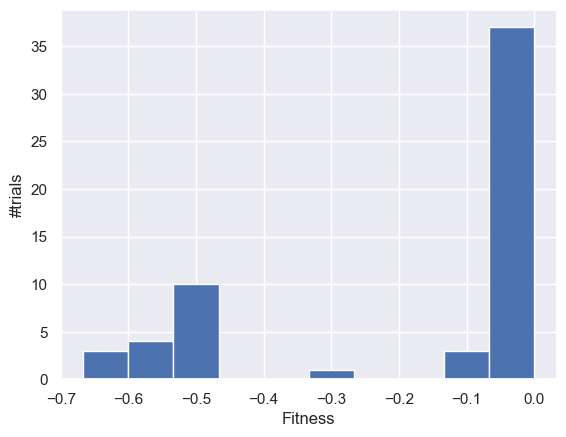

In [5]:
print(len(res))
plt.hist(res)
plt.xlabel("Fitness")
plt.ylabel('#trials')